Problema 1

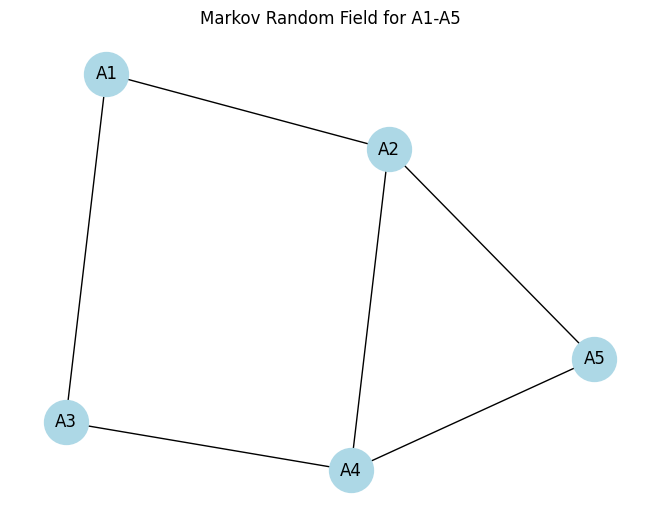

Most probable (MAP) configuration: {'A1': -1, 'A2': -1, 'A3': -1, 'A4': -1, 'A5': -1}
Probability: 0.45903892129649454
Cliques: [('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')]


In [3]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# definim graful
edges = [("A1", "A2"), ("A1", "A3"), ("A2", "A4"),
         ("A2", "A5"), ("A3", "A4"), ("A4", "A5")]

G = nx.Graph()
G.add_edges_from(edges)

# desenam reteaua Markov
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=12)
plt.title("Markov Random Field for A1-A5")
plt.show()

# stari posibile pentru variabilele binare (-1, +1)
states = list(itertools.product([-1, 1], repeat=5))
vars = ["A1", "A2", "A3", "A4", "A5"]

# definim energia (suma / muchii A_i * A_j)
def energy(state):
    mapping = dict(zip(vars, state))
    e = sum(mapping[i] * mapping[j] for i, j in edges)
    return e

# calculam probabilitatile nenormalizata: phi = exp(E)
probs = np.array([np.exp(energy(s)) for s in states])
probs /= probs.sum()  # normalize

# aici gasim cea mai probabila configuratie
max_idx = np.argmax(probs)
best_state = dict(zip(vars, states[max_idx]))

print("Most probable (MAP) configuration:", best_state)
print("Probability:", probs[max_idx])

# la final, determinam cliques
print("Cliques:", edges)


Problema 2

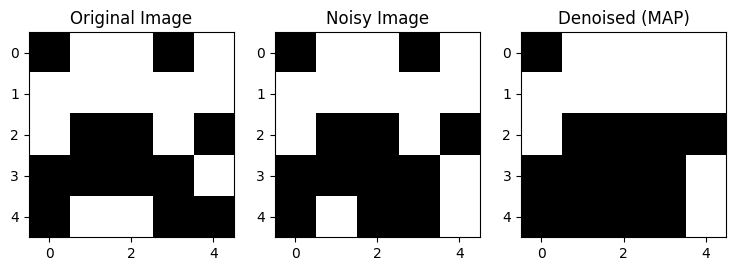

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# cream o imagine simpla 5x5
np.random.seed(0)
original = np.random.randint(0, 2, (5, 5))  # binary image (0 or 1)

# punem "noise" la 10% din pixeli
noisy = original.copy()
num_noisy = int(0.1 * noisy.size)
coords = np.random.choice(noisy.size, num_noisy, replace=False)
noisy.flat[coords] = 1 - noisy.flat[coords]  # inversam bitii

# definim parametrii
lam = 2.0  # regularizare (fidelitatea datelor vs smoothness)

# fct helper: calculam energia cu acea functie (nu f intuitiva)
def energy(x, y):
    E = lam * np.sum((x - y) ** 2)
    # smoothness term
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if i + 1 < x.shape[0]:
                E += (x[i, j] - x[i + 1, j]) ** 2
            if j + 1 < x.shape[1]:
                E += (x[i, j] - x[i, j + 1]) ** 2
    return E

# estimare MAP utlizand "Iterated Conditional Modes", care minimizeaza E(x)
denoised = noisy.copy()
for _ in range(5):  # cateva iteratii
    for i in range(5):
        for j in range(5):
            # vom incerca 0 si 1 pentru pixelul curent
            candidates = []
            for val in [0, 1]:
                temp = denoised.copy()
                temp[i, j] = val
                candidates.append((energy(temp, noisy), val))
            # alegem valoarea care ofera minimul de energie
            denoised[i, j] = min(candidates)[1]

# afidam rezultatele (original, noisy, denoised)
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].imshow(original, cmap="gray")
axes[0].set_title("Original Image")
axes[1].imshow(noisy, cmap="gray")
axes[1].set_title("Noisy Image")
axes[2].imshow(denoised, cmap="gray")
axes[2].set_title("Denoised (MAP)")
plt.show()
